## Consumer mall dataset

In [7]:
import pandas as pd

# Substitute the path_to_file content by the path to your csv file 
path_to_file = '../../datasets/dbscan/dbscan-with-python-and-scikit-learn-shopping-data.csv'
customer_data = pd.read_csv(path_to_file)

In [8]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
customer_data.shape

(200, 5)

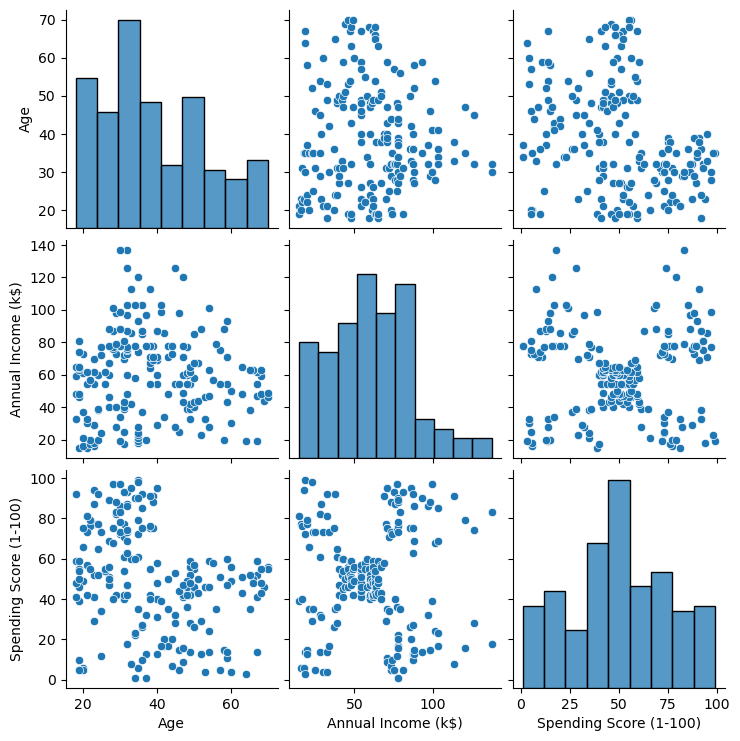

In [10]:
import seaborn as sns

# Dropping CustomerID column from data 
customer_data = customer_data.drop('CustomerID', axis=1)

sns.pairplot(customer_data);#.title('Combination of variables distribution and scatterplot');

In [11]:
# from sklearn.preprocessing import StandardScaler

In [12]:
# ss = StandardScaler()
# scaled_data = ss.fit_transform(customer_data)
# scaled_customer_data = pd.DataFrame(columns=selected_cols, data=scaled_data)

In [13]:
customer_data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [14]:
selected_cols = ['Annual Income (k$)', 'Spending Score (1-100)']
customer_data = customer_data[selected_cols]

In [15]:
# sns.scatterplot(data=customer_data, 
#                 x='Annual Income (k$)', y = 'Spending Score (1-100)');

In [16]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nn = NearestNeighbors(n_neighbors=3)   # minpoints - 1
nbrs = nn.fit(customer_data)
distances, indices = nbrs.kneighbors(customer_data)
# distances[:,1]
distances = np.sort(distances, axis=0)
distances = distances[:,1]

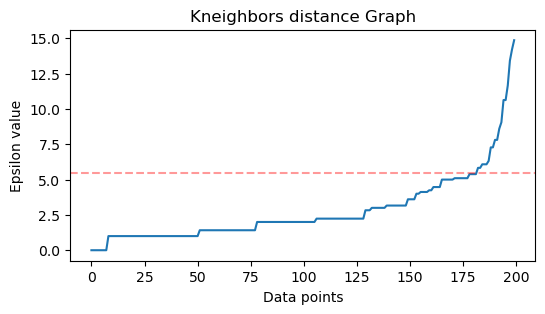

In [17]:
plt.figure(figsize=(6,3))
plt.plot(distances)
plt.axhline(y=5.5, color='r', linestyle='--', alpha=0.4)
plt.title('Kneighbors distance Graph')
plt.xlabel('Data points')
plt.ylabel('Epsilon value')
plt.show()

In [18]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=5.5, min_samples=3).fit(customer_data)
np.unique(dbs.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [19]:
customer_data['labels'] = dbs.labels_

In [20]:
customer_data.head()

,Annual Income (k$),Spending Score (1-100),labels
0,15,39,-1
1,15,81,0
2,16,6,1
3,16,77,0
4,17,40,-1


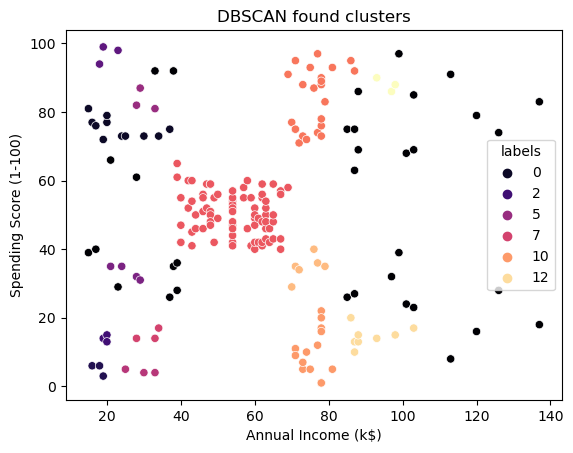

In [21]:
sns.scatterplot(data=customer_data, 
                x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='labels', palette='magma').set_title('DBSCAN found clusters');

In [ ]:
# import seaborn as sns
# from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
# adding clustered labels to dataframe
# df['cluster'] = dbs.labels_

In [ ]:
# df

In [ ]:
# from mpl_toolkits import mplot3d
# import numpy as np
# #deixa o grafico 3d
# %matplotlib notebook 

In [ ]:
# plotting graph with labels